<a href="https://colab.research.google.com/github/vasjafizer/scd/blob/main/%22lab1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

NameError: name 'train' is not defined

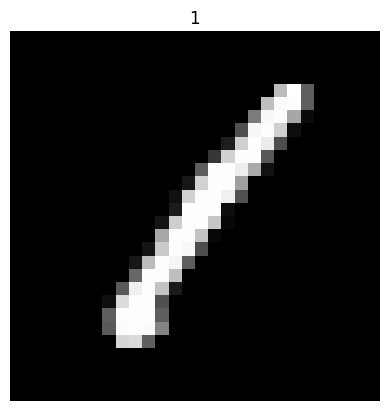

In [ ]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

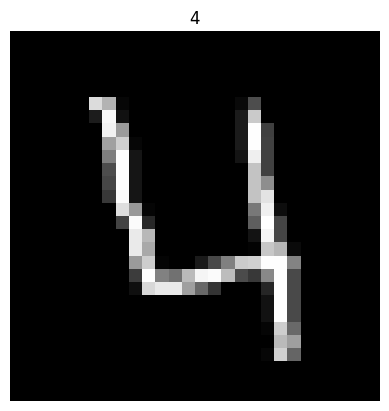

In [ ]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')

plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical  # Використання TensorFlow версії
Y_train = to_categorical(Y_train, num_classes=10)
print(Y_train)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size =
0.1, random_state=2)
print("x_train shape",X_train.shape)

print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


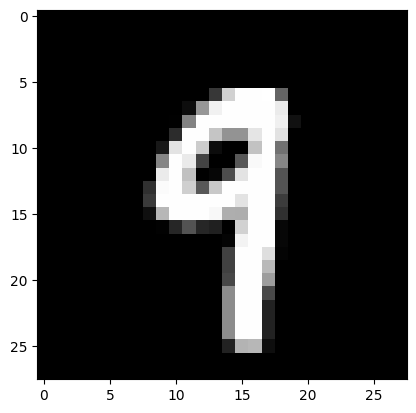

In [ ]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical  # конвертування у one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same',
                 activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
epochs = 10 # for better result increase the epochs
batch_size = 250

In [ ]:
datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=0.5, # randomly rotate images in the range 5 degrees
zoom_range = 0.5, # Randomly zoom image 5%
width_shift_range=0.5, # randomly shift images horizontally 5%
height_shift_range=0.5, # randomly shift images vertically 5%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images
datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 259ms/step - accuracy: 0.1378 - loss: 2.2721 - val_accuracy: 0.4395 - val_loss: 1.7724
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2720 - loss: 2.0252 - val_accuracy: 0.4640 - val_loss: 1.7667
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 254ms/step - accuracy: 0.2929 - loss: 1.9649 - val_accuracy: 0.6386 - val_loss: 1.2271
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3440 - loss: 1.8086 - val_accuracy: 0.6440 - val_loss: 1.2180
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 36s 238ms/step - accuracy: 0.3752 - loss: 1.7645 - val_accuracy: 0.7640 - val_loss: 0.9381
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3680 - loss: 1.7909 - val_accuracy: 0.7469 - val_loss: 0.9543
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 0.4218 - loss: 1.6577 - val_accuracy: 0.8440 - val_loss: 0.7176
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4520 - loss: 1.5458 - val_

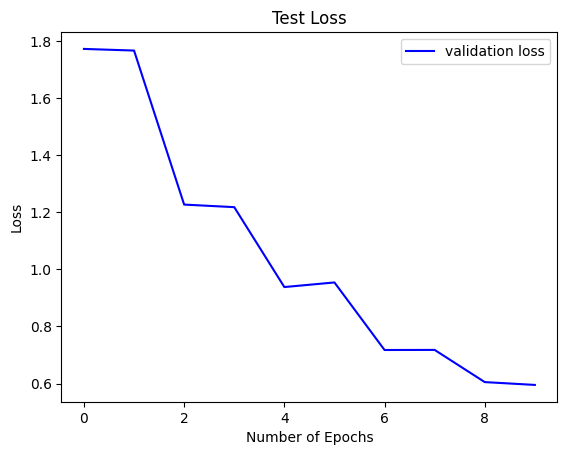

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")

plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


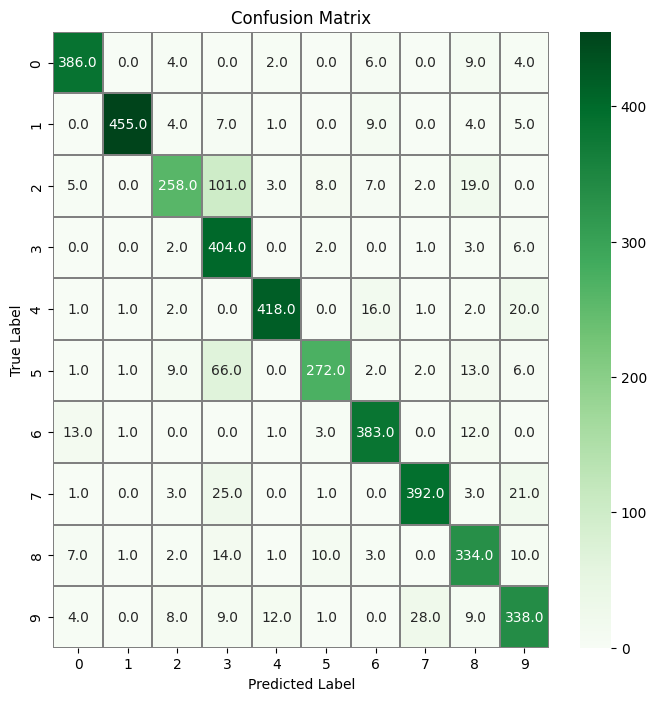

In [ ]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True,
linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

мої зображення

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Validation Accuracy: 86.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Зображення: three33.jpg, Передбачений клас: 3, Достовірність: 0.72


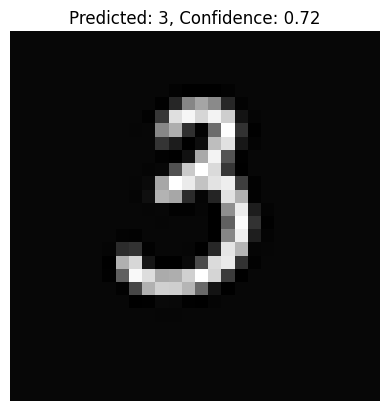

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Зображення: one1.jpg, Передбачений клас: 1, Достовірність: 0.66


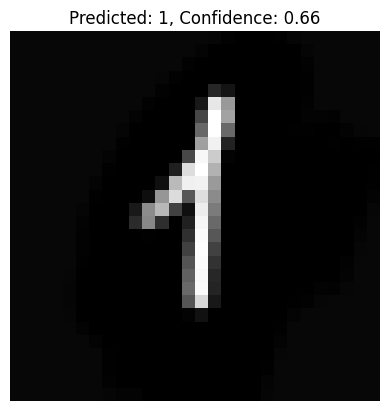

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Зображення: seven7.jpg, Передбачений клас: 8, Достовірність: 0.77


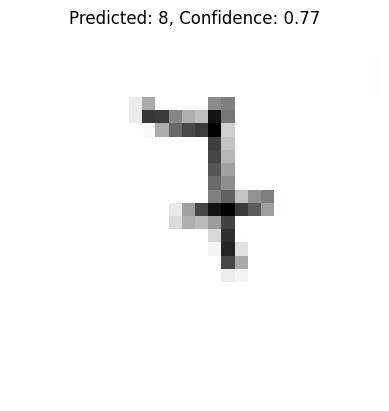

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Зображення: five5.jpg, Передбачений клас: 5, Достовірність: 0.45


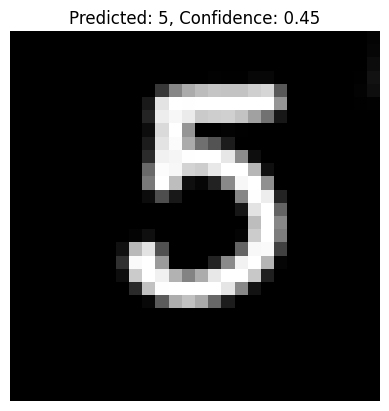

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Зображення: four4.jpg, Передбачений клас: 4, Достовірність: 0.52


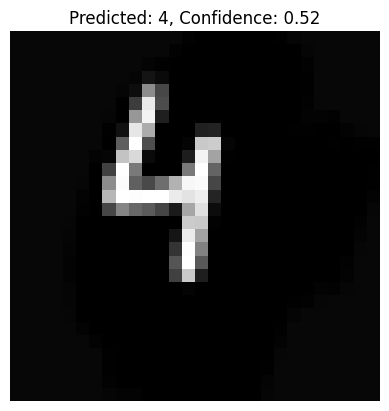

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Зображення: 2.jpg, Передбачений клас: 2, Достовірність: 0.23


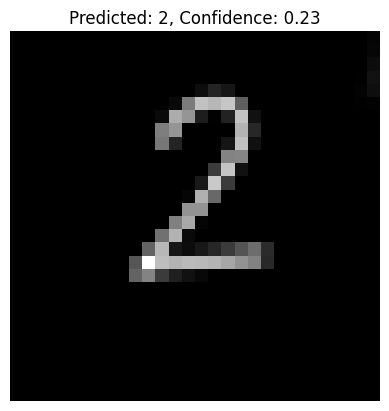

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Зображення: 7.jpg, Передбачений клас: 3, Достовірність: 0.35


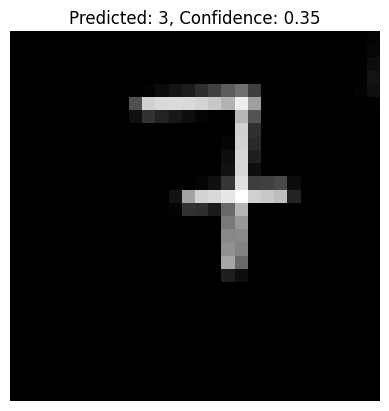

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Зображення: 22.jpg, Передбачений клас: 3, Достовірність: 0.25


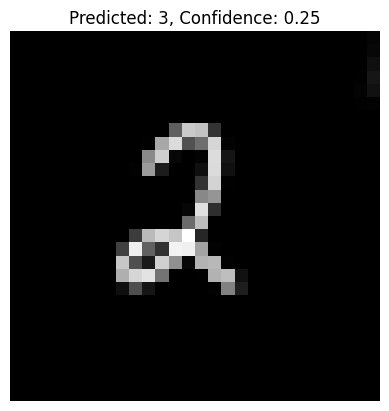

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Зображення: 222.jpg, Передбачений клас: 2, Достовірність: 0.37


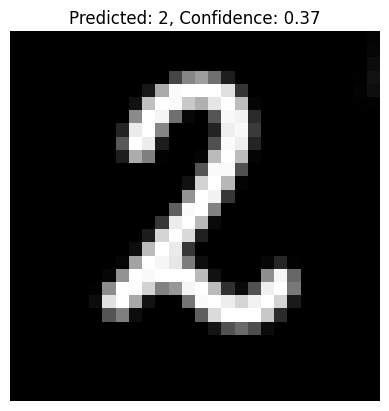

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

# Завантаження моделі, якщо вона збережена
# model = load_model('your_model_path.h5') # Розкоментуйте, якщо модель збережена

# Функція для передбачення та візуалізації
def predict_and_visualize(image_path):
    # Зчитуємо зображення та змінюємо розмір до 28x28
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))

    # Перетворюємо зображення в масив
    img_array = np.array(img) / 255.0  # Нормалізація
    img_array = img_array.reshape(1, 28, 28, 1)  # Додавання розміру партії

    # Передбачення класу
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Отримання класу з найвищою ймовірністю
    confidence = np.max(prediction)  # Найбільша ймовірність

    # Виводимо результати
    print(f"Зображення: {image_path}, Передбачений клас: {predicted_class}, Достовірність: {confidence:.2f}")

    # Візуалізація
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

# Виклик для всіх трьох зображень
predict_and_visualize("three33.jpg")
predict_and_visualize("one1.jpg")
predict_and_visualize("seven7.jpg")
predict_and_visualize("five5.jpg")
predict_and_visualize("four4.jpg")
predict_and_visualize("2.jpg")
predict_and_visualize("7.jpg")
predict_and_visualize("22.jpg")
predict_and_visualize("222.jpg")



lion optimizer

In [ ]:
import tensorflow as tf

# Тепер можна використовувати keras через tensorflow
optimizer1 = tf.keras.optimizers.Lion(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="lion"
)

In [ ]:
model.compile(optimizer = optimizer1 , loss = "categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
epochs = 10 # for better result increase the epochs
batch_size = 250

In [ ]:
datagen = ImageDataGenerator(
featurewise_center=False, # set input mean to 0 over the dataset
samplewise_center=False, # set each sample mean to 0
featurewise_std_normalization=False, # divide inputs by std of the dataset
samplewise_std_normalization=False, # divide each input by its std
zca_whitening=False, # dimesion reduction
rotation_range=0.5, # randomly rotate images in the range 5 degrees
zoom_range = 0.5, # Randomly zoom image 5%
width_shift_range=0.5, # randomly shift images horizontally 5%
height_shift_range=0.5, # randomly shift images vertically 5%
horizontal_flip=False, # randomly flip images
vertical_flip=False) # randomly flip images
datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - accuracy: 0.4760 - loss: 1.5184 - val_accuracy: 0.8983 - val_loss: 0.4343
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5480 - loss: 1.3989 - val_accuracy: 0.8852 - val_loss: 0.4475
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - accuracy: 0.5070 - loss: 1.4202 - val_accuracy: 0.9219 - val_loss: 0.3214
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5240 - loss: 1.3494 - val_accuracy: 0.9029 - val_loss: 0.3698
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 37s 243ms/step - accuracy: 0.5360 - loss: 1.3527 - val_accuracy: 0.9081 - val_loss: 0.3272
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5240 - loss: 1.3108 - val_accuracy: 0.9183 - val_loss: 0.3020
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 233ms/step - accuracy: 0.5590 - loss: 1.2884 - val_accuracy: 0.9364 - val_loss: 0.2400
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5200 - loss: 1.3483 - val

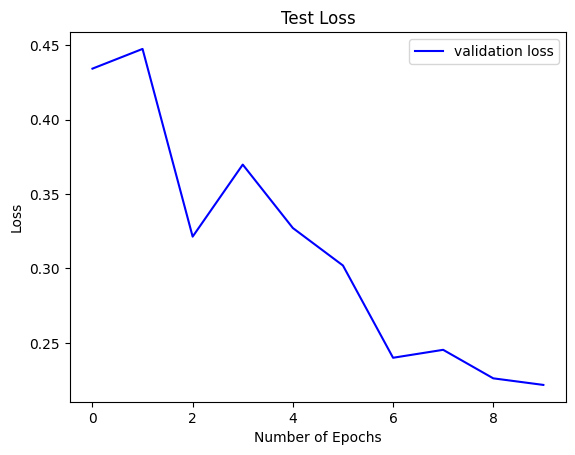

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")

plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


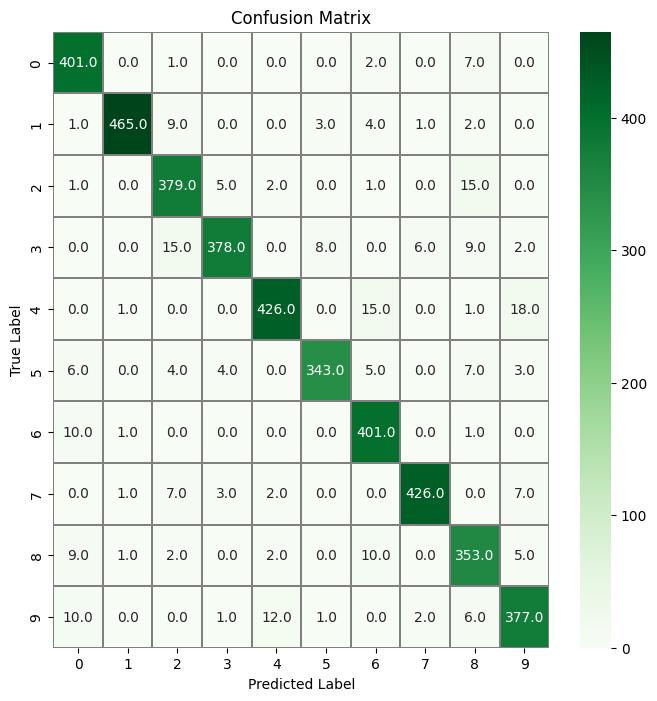

In [ ]:
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True,
linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Додаткові шари
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
epochs = 10 # for better result increase the epochs
batch_size = 250

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,   # змінено
    zoom_range=0.3,      # змінено
    width_shift_range=0.3,  # змінено
    height_shift_range=0.3, # змінено
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - accuracy: 0.1580 - loss: 2.2308 - val_accuracy: 0.6202 - val_loss: 1.2822
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4040 - loss: 1.6750 - val_accuracy: 0.6198 - val_loss: 1.2760
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.4328 - loss: 1.5729 - val_accuracy: 0.7731 - val_loss: 0.8007
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4880 - loss: 1.4838 - val_accuracy: 0.7740 - val_loss: 0.7983
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 255ms/step - accuracy: 0.5519 - loss: 1.2934 - val_accuracy: 0.8314 - val_loss: 0.5982
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6280 - loss: 1.0445 - val_accuracy: 0.8310 - val_loss: 0.5985
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 42s 269ms/step - accuracy: 0.6011 - loss: 1.1534 - val_accuracy: 0.8593 - val_loss: 0.4928
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6440 - loss: 1.0047 - val_

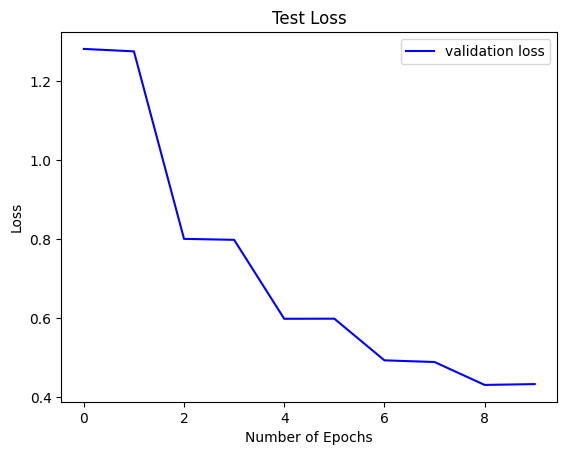

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")

plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


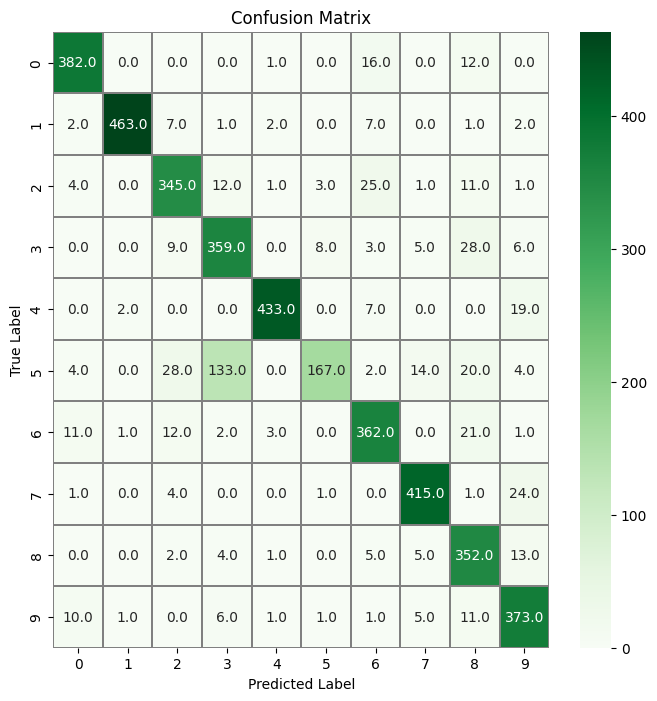

In [ ]:
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True,
linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()